In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('1.csv')

In [3]:
df = df.drop(['Id','Start time','Completion time','Email','Name'], axis=1)

In [4]:
df2 = pd.read_excel('2.xlsx')

In [5]:
columns_to_keep = [
    df.columns[6],   # Question 7
    df.columns[7],   # Question 8
    df.columns[12],  # Question 13
    df.columns[13],  # Question 14
    df.columns[14],  # Question 15
    df.columns[15],  # Question 16 
    df.columns[38],  # Question 26
    df.columns[39],
    df.columns[40], # Question 27
    df.columns[41]
]

# Create the new DataFrame with the selected columns
df1 = df[columns_to_keep].copy()


In [6]:
df1

,I feel that I prefer to buy items of higher quality or essential clothing for long-term usage rather than impulsive purchases to chase the trend after the COVID-19 pandemic..,I have become more cautious about spending money on fast fashion due to the economic uncertainty caused by the COVID-19 pandemic..,"I am experiencing a shift in shopping methods for fast fashion retailers following the COVID-19 pandemic. For instance, there is an increased emphasis on online shopping and offline pickup options..",Social media can more easily persuade me for impulsive fast fashion purchases even if they are not sustainable after the COVID-19 pandemic..,I feel fast fashion virally marketing more on social media encourages consumerism after the COVID-19 pandemic..,I feel my shopping habits shifted more towards online platforms since the COVID-19 pandemic..,"My attitude towards sustainability has increasingly influenced my purchase decisions in fast fashion since the COVID-19 pandemic. For instance, I will sometimes give up on fast fashion items purchases",How important is it for you that fast fashion products use eco-friendly materials or taking a sustainable approach after the COVID-19 pandemic?.,I have started to prefer brands that are more engaged in promoting sustainability practices since the COVID-19 pandemic..,Have you observed an increase in marketing related to sustainability from fast fashion brands since the COVID-19 pandemic? How does this influence your purchasing decisions?
0,Neither agree nor disagree,Agree,NaN,Agree,Agree,Agree,Agree,Neutral,Neither agree nor disagree,Somewhat increased and somewhat influenced my ...
1,Strongly agree,Agree,Agree,Disagree,Agree,Disagree,Strongly disagree,Somewhat important,Agree,Somewhat increased and somewhat influenced my ...
2,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat important,Agree,I have not noticed any changes
3,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree,Agree,Disagree,Agree,Somewhat important,Agree,Somewhat increased and somewhat influenced my ...
4,Neither agree nor disagree,Neither agree nor disagree,Agree,Disagree,Neither agree nor disagree,Agree,Agree,Neutral,Disagree,No change in marketing and no influence on my ...
...,...,...,...,...,...,...,...,...,...,...
146,Agree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,Extremely important,Agree,No change in marketing and no influence on my ...
147,Strongly agree,Agree,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Somewhat important,Strongly agree,Somewhat increased and somewhat influenced my ...
148,Strongly agree,Neither agree nor disagree,Disagree,Strongly disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Somewhat not important,Disagree,No change in marketing and no influence on my ...
149,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Somewhat important,Neither agree nor disagree,No change in marketing and no influence on my ...


In [7]:
df1 = pd.concat([df1, df2], axis=1)

In [8]:
new_column_names = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')[:len(df1.columns)]

# Rename the columns
df1.columns = new_column_names

In [9]:
importance_mapping = {
    'Extremely important': 5,
    'Somewhat important': 4,
    'Neutral': 3,
    'Somewhat not important': 2,
    'Extremely not important': 1
}

# Define mapping for Likert scale
likert_mapping = {
    'Strongly agree': 5,
    'Agree': 4,
    'Neither agree nor disagree': 3,
    'Disagree': 2,
    'Strongly disagree': 1
}
response_mapping = {
    "Greatly increased and positively influenced my decisions": 5,
    "Somewhat increased and somewhat influenced my decisions": 4,
    "No change in marketing and no influence on my decisions": 3,
    "Decreased and negatively influenced my decisions": 2,
    "I have not noticed any changes": 1
}

In [10]:
df1[['A', 'B', 'C', 'D', 'E', 'F','G','I']] = df1[['A', 'B', 'C', 'D', 'E', 'F','G','I']].applymap(lambda x: likert_mapping.get(x, x))
df1[['H']] = df1[['H']].applymap(lambda x: importance_mapping.get(x, x))
df1['J'] = df1['J'].map(response_mapping)

C:\Users\nevea\AppData\Local\Temp\ipykernel_26412\1385001927.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1[['A', 'B', 'C', 'D', 'E', 'F','G','I']] = df1[['A', 'B', 'C', 'D', 'E', 'F','G','I']].applymap(lambda x: likert_mapping.get(x, x))
C:\Users\nevea\AppData\Local\Temp\ipykernel_26412\1385001927.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1[['H']] = df1[['H']].applymap(lambda x: importance_mapping.get(x, x))


In [11]:
df1_cleaned = df1.dropna()

In [12]:
df1_cleaned

,A,B,C,D,E,F,G,H,I,J,K
1,5,4,4.0,2,4,2,1,4,4,4,-0.20
2,4,4,3.0,3,4,3,3,4,4,1,0.10
3,3,3,2.0,2,4,2,4,4,4,4,0.00
4,3,3,4.0,2,3,4,4,3,2,3,-0.50
5,3,3,4.0,4,3,3,3,2,3,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...
146,4,5,5.0,4,3,4,4,5,4,3,-0.20
147,5,4,4.0,5,5,4,5,4,5,4,-0.10
148,5,3,2.0,1,3,4,3,2,2,3,0.05
149,4,4,4.0,4,4,4,4,4,3,3,-0.10


C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


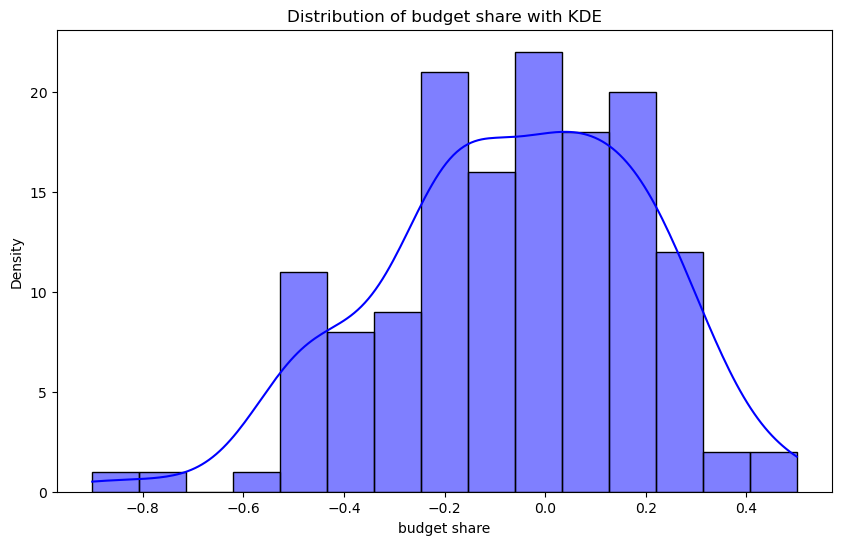

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1_cleaned is your DataFrame and 'K' is the column of interest
plt.figure(figsize=(10, 6))
sns.histplot(df1_cleaned['K'], bins=15, kde=True, color='blue')
plt.title('Distribution of budget share with KDE')
plt.xlabel('budget share')
plt.ylabel('Density')
plt.show()


In [13]:
pip install mord

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install linearmodels

In [17]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is your DataFrame with the necessary columns
# Independent variables
exog_vars = ['H', 'I', 'J']
exog = sm.add_constant(df1_cleaned[exog_vars])

# Dependent variable
endog = df1_cleaned['G']

# Convert to binary if not already binary (example: threshold at 3)
# Assuming G has more than two categories, convert to binary
endog_binary = (endog > 3).astype(int)  # Convert to binary: 0 if G <= 3, 1 if G > 3

# Creating the logistic regression model
logit_model = sm.Logit(endog_binary, exog)

# Fitting the model
results = logit_model.fit()

# Viewing the results
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.531129
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      G   No. Observations:                  144
Model:                          Logit   Df Residuals:                      140
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 Sep 2024   Pseudo R-squ.:                  0.2311
Time:                        16:14:27   Log-Likelihood:                -76.483
converged:                       True   LL-Null:                       -99.466
Covariance Type:            nonrobust   LLR p-value:                 5.766e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0210      1.143     -5.269      0.000      -8.260      -3.781
H              0.7229      0.

In [46]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is your DataFrame with the necessary columns
# Independent variables
exog_vars = ['D', 'E']
exog = sm.add_constant(df1_cleaned[exog_vars])

# Dependent variable
endog = df1_cleaned['B']

# Convert to binary if not already binary (example: threshold at 3)
# Assuming G has more than two categories, convert to binary
endog_binary = (endog > 3).astype(int)  # Convert to binary: 0 if G <= 3, 1 if G > 3

# Creating the logistic regression model
logit_model = sm.Logit(endog_binary, exog)

# Fitting the model
results = logit_model.fit()

# Viewing the results
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.587326
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      B   No. Observations:                  144
Model:                          Logit   Df Residuals:                      141
Method:                           MLE   Df Model:                            2
Date:                Mon, 02 Sep 2024   Pseudo R-squ.:                 0.08405
Time:                        18:40:04   Log-Likelihood:                -84.575
converged:                       True   LL-Null:                       -92.336
Covariance Type:            nonrobust   LLR p-value:                 0.0004262
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4314      0.878     -2.769      0.006      -4.153      -0.710
D              0.3246      0.

In [60]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Independent variables
df1_cleaned['D_B'] = df1_cleaned['D'] * df1_cleaned['B']
X = df1_cleaned[['D', 'B','D_B']]
y = df1_cleaned['A']

# Fit the ordered logistic regression model
ordinal_model = OrderedModel(y, X, distr='logit')
result = ordinal_model.fit(method='bfgs')

# View the results
print(result.summary())


C:\Users\nevea\AppData\Local\Temp\ipykernel_26412\2609195280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['D_B'] = df1_cleaned['D'] * df1_cleaned['B']


Optimization terminated successfully.
         Current function value: 1.126089
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                             OrderedModel Results                             
Dep. Variable:                      A   Log-Likelihood:                -162.16
Model:                   OrderedModel   AIC:                             338.3
Method:            Maximum Likelihood   BIC:                             359.1
Date:                Tue, 03 Sep 2024                                         
Time:                        17:04:03                                         
No. Observations:                 144                                         
Df Residuals:                     137                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [62]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Assuming df1_cleaned is already a DataFrame with the necessary columns
# Independent variables
df1_cleaned['D_B'] = df1_cleaned['D'] * df1_cleaned['B']
X = df1_cleaned[['D', 'B', 'D_B']]
y = df1_cleaned['A']

# Fit the ordered logistic regression model
ordinal_model = OrderedModel(y, X, distr='logit')
result = ordinal_model.fit(method='bfgs')

# Extract p-values
p_values = result.pvalues
print(p_values)


C:\Users\nevea\AppData\Local\Temp\ipykernel_26412\686607919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['D_B'] = df1_cleaned['D'] * df1_cleaned['B']


Optimization terminated successfully.
         Current function value: 1.126089
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
D      4.252012e-01
B      1.025577e-03
D_B    3.352639e-01
1/2    6.460758e-01
2/3    6.093138e-04
3/4    2.076512e-01
4/5    3.013610e-19
dtype: float64
